In [1]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['font.size'] = 15
import xarray as xr
import random
import time
from IPython.display import display, clear_output

# LURE THE CATS - Playground




Jason Müller (muellerj@tropos.de)

May 9, 2024

StuMeTa 2024 in Leipzig

---



## How to play

### The scenario
* All teams are all sitting in an empty room with one door 
* Each team gets a specific amount of treats
* A known amount of  very cute cats are released into the room one by one
* ***The cats are always hungry ans will go to the team that offers them the most treats***
* ***The teams are in desperate need of some cat-cuddeling and want to lure in the most cats***
* A team cannot place more treats than it currently has

### Aim of the game 
***Pet more cats than all other teams***

### Gameplay
1. Before a cat enters the room, each team simultaneously places a specific number of treats as a bet
2. The cat enters the room and will join the team with the largest amount of treats 
3. If there is a tie, the cat will decide among the winners
4. All placed treats of all teams will be tossed out
5. The teams place a new number of treats for the next cat
6. Repeat


### Some hints 
* You loose every treat you bet wether you win this round or not
* You don't have to bet each round if you don't want to 
* In an ideal world you would only slightly outbid the second highest bid
* You can track the other teams budgets 
* You can track the other teams bidding behaviour
* Treats that are unused after the last round are worth nothing


### Important note
* ***This is not a game of luck*** ... There are stronger and less strong solutions to this problem 
* ***There is no perfect stategy*** ... even the strongest algorythm can be countered (I think)
* ***Be creative*** 
* ***Have fun***


### Disclaimer
* This program could have been written in a much nicer way. Please don't take this as an example of very well written code. 

## The Players Algorythms
* ### Has to be written as a python-function

**AVAILABLE INPUT VARIABLES**
* ```total_rounds```
    * Integer, static
    * total number of rounds
    
* ```total_budget```
    * Integer, static
    * total budget at the begin of the game

* ```current_round```
    * Integer, dynamic
    * the current round number
    
* ```my_budget```
    * Integer, dynamic
    * your current budget
    
* ```my_wins```    
    * 1D List, dynamic
    * number of rounds won by you
    
* ```my_bids```    
    * 1D List, dynamic
    * your bids so far
    
* ```last_winning_bid```
    * Integer, dynamic
    * The winning bid of last round
    
* ```budgets ```   
    * 1D List, dynamic: 
    * current budgets of all teams
    
* ```win_log```
    * 2D List ```(nplayers, nrounds)```, dynamic
    * A List that tracks all wins by each of the players. On line is added after each round

* ```bid_log```
    * 2D List ```(nplayers, nrounds)```, dynamic
    * A List that tracks all bids by each of the players. On line is added after each round 

**OUTPUT VARIABLES**

* Only ONE output variable!
* Float that contains your bid for the current round

**RULES**

* Allowed Modules: 
    * ```numpy as np```
    * ```xarray as xr```
    * ```random```
    * if further modules are needed please talk to me first
    
    
* Please don't try to break the game (Please!)
    * No algorythms with excessive runtime or memory consumption
    * No nonsensical bets e.g trying to pass negative beds to gain money, ...
    * **Please test your functions**


## Develop your algorithm here

In [2]:
def your_algo(total_rounds,total_budget, current_round, my_budget, my_wins, my_bids, last_winning_bid, budgets, win_log, bid_log):
    # Put your Code Here
    
    
    
    
    my_bid = 1
    return(my_bid)

## Usefull Code Snippets

### The following code snippets demonstrate possible ways to use all the input variables to build an algoryhm. They are only ideas! You can do it much better!

In [3]:
def snippets_algo(total_rounds,total_budget, current_round, my_budget, my_wins, my_bids, last_winning_bid, budgets, win_log, bid_log): 
    
    ## FIND A RANDOM NUMBER BETWEEN 5% AND 10% OF THE REMAINING BUDGET 
    random_number = random.uniform(my_budget*0.05, my_budget*0.1)
    
    
    ## FIND THE AVERAGE BID YOU CAN MAKE WITH THE GIVEN GAME SETTINGS 
    average_bid = total_budget / total_rounds   # Divide the total budget by the total rounds
    
    
    ## CHECK IF ITS THE LAST ROUND, IF YES SPEND ALL THE BUDGET
    if current_round == total_rounds -1 :
        my_bid = my_budget 
        
    
    ## CHECK IF THE BID I AM ABOUT TO SUBMIT IS MORE THAN X% OF MY REMAINING BUDGET (I want to prevent my algorythm from spending all the many at once) 
    bid_i_want_to_check = 5000
    max_i_want_to_spend = 0.05 #5%
    if bid_i_want_to_check > my_budget * max_i_want_to_spend:
        my_bid = 0
    
    
    ## GET THE BID I PLACED LAST ROUND
    bid_from_last_round = my_bids[current_round - 1]
    
    
    ## GET THE AVERAGE OF MY LAST X BIDS (Only works after x rounds)
    x = 5  # check last 5 rounds
    if current_round > x:
        mean_last_5_bids = np.mean(my_bids[current_round -x -1 : current_round - 1])
    
    
    ## CHECK WETHER I WON LAST ROUND AND ONLY IF NOT INCREASE THE LAST WINNING BID BY 10%
    if my_wins[current_round-1] == my_wins[current_round-2]: #True if I didn't win
        my_new_bid = last_winning_bid * 1.1 #increase by 10%
    
    
    ## CHECK IF I AM CURRENTLY THE TEAM WITH THE HIGHEST BUDGET LEFT. IF YES, ADJUST THE BIDS
    filthy_rich_score = (my_budget - np.mean(budgets)) * 0.1 # How much more do I have than all the others?
    if np.max(budgets) == my_budget:                         # True if my budgets is the greatest
        my_bid = my_bid + filthy_rich_score                  # Increase bid ... or should it rather decrease? 
        
        
    ## CHECK WETHER THE WINS ARE SO FAR EVENLY DISTRIBUTED OR IF ONE TEAM IS PULLING AWAY; IF YES... BID MORE AGRESSIVELY
    win_std = (np.std(np.array(win_log), axis = 0))[current_round-1]        # Standart deviation of wins in the last round
    sorted_wins_from_last_round = np.sort(np.array(win_log)[:,current_round-1])   #Sort the wins of last round by number of rounds won
    sorted_wins_from_last_round = sorted_wins_from_last_round[::-1]               #Reverse the order so that the first element is the win-count of the leader and the second element the win-count of the second 
    diff_leader2second = sorted_wins_from_last_round[0] - sorted_wins_from_last_round[1] # Calculate difference between leader and second
    
    if diff_leader2second > win_std:     #True if the leader is more than one standart deviation ahead 
        my_bid = my_bid *2               #If True -> Bid more aggressively
    
    
    ## GET AVERAGE OF THE LAST X WINNING BIDS
    x = 5                                              # Look at the last 5 rounds
    winning_bids = np.max(np.array(bid_log), axis = 0) # For every Round, get the highest bid
    if current_round > x:                              # Only works after the Xth round
        current_cat_price = np.mean(winning_bids[(current_round - x - 1):current_round - 1]) #Calculate the mean of the last winning bids
    
    
    
    
    my_bid = current_round/2   #Finally produce some values so the game can start
    return(my_bid)





### Dummy Algorythm

In [4]:
def dummy_algo(total_rounds,total_budget, current_round, my_budget, my_wins, my_bids, last_winning_bid, budgets, win_log, bid_log): 
    # Dummy Algorythm places a random bet between 0 and 5% of its budget
    
    my_bid = random.uniform(0,my_budget*0.05) 
    
    return(my_bid)

## Game Settings

In [5]:
# Game settings
total_rounds = 100
total_budget = 1000

In [6]:
players = {"You": your_algo,
           "Dummy": dummy_algo,
           "Snippy_McSnipface" : snippets_algo
          }

## Functions that actually run the game - Don't change this code

In [7]:
def find_winner(bids, wins, budgets):
    
    """
    Determine the winner and update budget

    Parameters
    ----------
        bids : Dictionary, bids for current round

        wins : Dictionary, wins so far 

        budgets : Dictionary, wins so far

    Returns
    -------
        wins : Dictionary, updated wins 

        max_bid : float, maximum bid in current round
    """
    
    players = list(bids.keys())
    
    for player in player_lst: 
        if budgets.get(player) < bids.get(player):
            bids[player] = 0
        budgets[player] =   budgets[player] - bids[player] # Everyone looses budget
        
    max_bid = max(bids.values())
    winners = [player for player, bid in bids.items() if bid == max_bid]

    if len(winners) == 1:
        winner = winners[0]
    else:
        winner = random.choice(winners)
        
        
    wins[winner] = wins[winner]+1
    #budgets[winner] =   budgets[winner] - bids[winner]     # Only winner looses budget
    return(wins, max_bid)

In [8]:

def log_data(i, bid_log, win_log, bids, wins):
    """
    Take the wins and bids of the current round and add them to the log.
    
    Parameters
    ----------
        i : integer, current round number
        
        bid_log : Dictionary {string : numpyarray}, players and their bids for every round so far
        
        win_log : Dictionary {string : numpyarray}, players and their win-count for every round so far
        
        bids : Dictionary {string : float}, players and their current bid
        
        wins : Dictionary {string : integer}, players and their current win-count
        
     Returns
     -------
        bid_log : Dictionary {string : numpyarray}, players and their updated bids for every round
        
        win_log : Dictionary {string : numpyarray}, players and their updated win-count for every round
    """
    
    players = list(bids.keys())
    for player in players:    
        bid_log[player][i] = bids[player]
        win_log[player][i] = wins[player]  
    return(bid_log, win_log)

In [9]:
def plot_standings(wins):
    
    """
    Produce a bar-plot with the current standings

    Parameters
    ----------
        wins : Dictionary {string : integer}, players and their current win-count

    """
    
    
    clear_output(wait = True)
    #plt.pause(0.001)
    cmap = plt.cm.viridis
    bar_colors = [cmap(x) for x in np.linspace(0, 1, len(wins))]
    ax.set_title("Round " + str(i+1) + " out of " + str(total_rounds))
    p =ax.bar(list(wins.keys()), list(wins.values()),  color=bar_colors)

    ax.set_ylabel('Wins')
    display(fig)    
    

    plt.show()

In [10]:

def save_data(bid_log, win_log):
    
    """
    Write the logs into an net-cdf file

    Parameters
    ----------
        bid_log : Dictionary {string : numpyarray}, players and their bids for every round

        win_log : Dictionary {string : numpyarray}, players and their win-count for every round

    Returns
    -------
    combined_dataset : xarray dataset       
                                        dims:(Players, Rounds); 
                                        variables: (wins, bids); 
                                        attributes: (total_budget, total_rounds)

    """

    
    renamed_win_log = {}
    renamed_bid_log = {}
    players = list(bid_log.keys())
    
    for key, value in win_log.items():
        win_key = f"{key}_points"
        renamed_win_log[win_key] = value
        
    for key, value in bid_log.items():
        bid_key = f"{key}_bids"
        renamed_bid_log[bid_key] = value
    
    # Build Xarray Dataset from Dictionaries (there must also be a better way than this:)
    wins_dataset = xr.Dataset({key: (['Rounds'], value) for key, value in renamed_win_log.items()})
    variables_to_concat = list(wins_dataset.data_vars.values())
    wins_dataset["wins"] = xr.concat(variables_to_concat, dim=players)
    wins_dataset = wins_dataset["wins"].rename({'concat_dim': 'Players'})
    
    bids_dataset = xr.Dataset({key: (['Rounds'], value) for key, value in renamed_bid_log.items()})
    variables_to_concat = list(bids_dataset.data_vars.values())
    bids_dataset["bids"] = xr.concat(variables_to_concat, dim=players)
    bids_dataset = bids_dataset["bids"].rename({'concat_dim': 'Players'})
    
    
    combined_dataset = xr.merge([wins_dataset, bids_dataset])
    combined_dataset.attrs['Total_Budget'] = total_budget
    combined_dataset.attrs['Total_Rounds'] = total_rounds
    combined_dataset = combined_dataset.assign_coords({"Rounds" :combined_dataset.Rounds })
    
    
    output_filename = "budget"+str(total_budget)+ "_rounds"+str(total_rounds)+".nc"
    combined_dataset.to_netcdf(output_filename)
    
    return(combined_dataset)

## Start actual game - Don't change this Code

In [11]:
player_lst = list(players.keys())
current_round = 0
last_winning_bid = 0

empty_log = np.zeros(total_rounds)

wins = {string: 0 for string in player_lst}
budgets = {string: total_budget for string in player_lst}
bids = {string: 0 for string in player_lst}

win_log = {string: np.zeros(total_rounds) for string in player_lst}
bid_log = {string: np.zeros(total_rounds) for string in player_lst}


In [12]:
for i in np.arange(total_rounds):
    
    for key, value in players.items():
           bids[key] = abs(players[key](total_rounds, total_budget, i,budgets.get(key), list(win_log.get(key)), list(bid_log.get(key)),last_winning_bid, list(budgets.values()),list(win_log.values()), list(bid_log.values())))
    
    
    wins, last_winning_bid = find_winner(bids, wins, budgets) 
    bid_log, win_log = log_data(i, bid_log, win_log ,bids, wins)
ds = save_data(bid_log, win_log)   

## Results

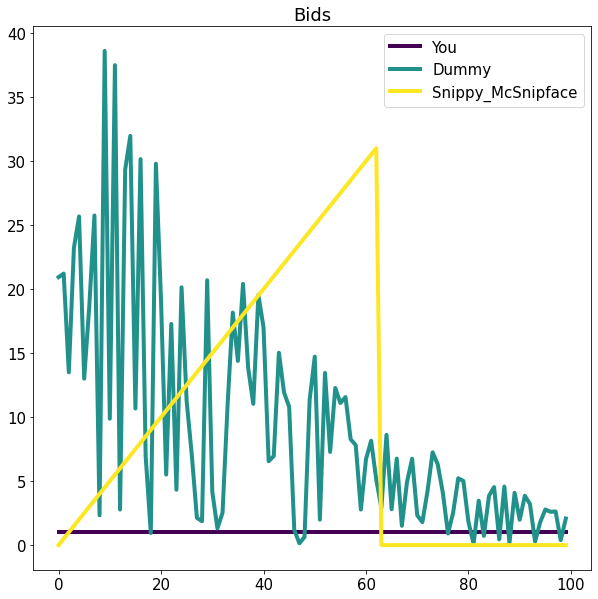

In [13]:
cmap = plt.cm.viridis
bar_colors = [cmap(x) for x in np.linspace(0, 1, len(wins))]
lw = 4
plt.subplots(figsize = (10,10))
plt.plot(ds.Rounds, ds.bids.sel(Players = "You"), label = "You", color = bar_colors[0], linewidth = lw)
plt.plot(ds.Rounds, ds.bids.sel(Players = "Dummy"), label = "Dummy", color = bar_colors[1], linewidth = lw)
plt.plot(ds.Rounds, ds.bids.sel(Players = "Snippy_McSnipface"), label = "Snippy_McSnipface", color = bar_colors[2], linewidth = lw)
plt.title("Bids")
plt.legend()

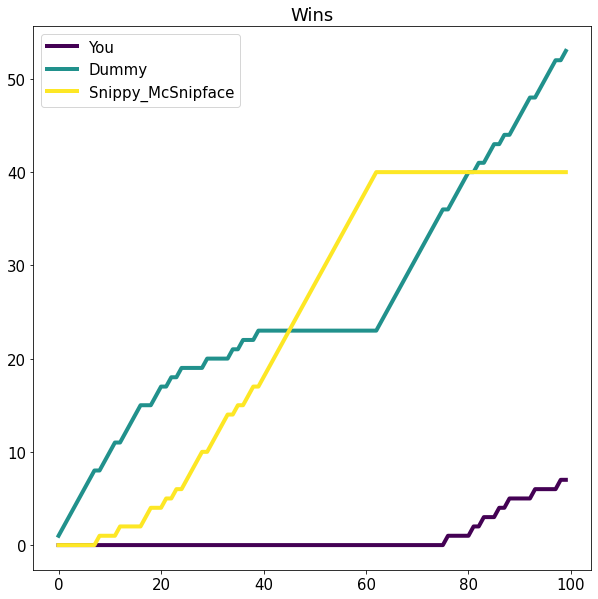

In [14]:
plt.subplots(figsize = (10,10))
plt.plot(ds.Rounds, ds.wins.sel(Players = "You"), label = "You", color = bar_colors[0], linewidth = lw)
plt.plot(ds.Rounds, ds.wins.sel(Players = "Dummy"), label = "Dummy", color = bar_colors[1], linewidth = lw)
plt.plot(ds.Rounds, ds.wins.sel(Players = "Snippy_McSnipface"), label = "Snippy_McSnipface", color = bar_colors[2], linewidth = lw)
plt.title("Wins")
plt.legend()